# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [110]:
# your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [3]:
# your answer here

employee = pd.read_csv('data/Employee.csv')

In [28]:
employee.head(20)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [ ]:
employee['Salary']

#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [24]:
# Method 1
# your answer here

employee.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [35]:
# Method 2
# your answer here


employee.pivot_table(index = ['Department'], values = ['Salary'], aggfunc = 'mean').head()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [39]:
# your answer here
employee.pivot_table(index = ['Department','Title'], values = ['Salary'], aggfunc = 'mean').head()

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [46]:
# your answer here

employee.pivot_table(index = ['Title','Years'], values = ['Salary'], aggfunc = 'mean').head()

Salary
Title     Years        
VP        8          70
analyst   1          35
          2          30
          4          35
associate 2          55

In [55]:
employee.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [78]:
# your answer here

#employee.pivot_table(index = ['Department','Title'], values = ['Salary','Name'], aggfunc = {'Salary': 'mean', 'Name': 'count'}).head()

employee.pivot_table(index = ['Department','Title'], values = ['Salary'], aggfunc = ['mean', 'count']).head()

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [87]:
# your answer here
table = employee.pivot_table(index = ['Department','Title'], values = ['Salary'], aggfunc = ['min','max','mean','std'])

# In some cases there is only 1 person working with a specific title in each department, therefore the standard deviation cannot be calculated.

table

min    max   mean       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP            70     70   70.0       NaN
           analyst       30     35   32.5  3.535534
IT         VP            70     70   70.0       NaN
           analyst       30     35   32.5  3.535534
           associate     60     60   60.0       NaN
Sales      associate     55     55   55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [88]:
# your answer here

table.fillna(0, inplace = True)

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [91]:
# your answer here

employee.pivot_table(index = ['Department'], values = ['Salary'], aggfunc = ['count','sum'])

,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [95]:
# your answer here

employee.pivot_table(index = ['Department','Title'], values = ['Years','Salary'], aggfunc = {'Years':'sum','Salary':'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [97]:
# your answer here

fitbit = pd.read_csv('Data/Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [98]:
# your answer here

fitbit.head(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
5,13-05-2015,276,779,5.79,15,726.000,172,34,18,1094,405,47,31,457
6,14-05-2015,2687,5614,4.17,2,782.000,216,13,1,9830,381,28,12,415
7,15-05-2015,2793,8169,6.07,14,801.000,218,8,7,1092,269,34,16,306
8,16-05-2015,4061,19971,14.84,18,532.000,247,101,118,27,452,26,18,507
9,17-05-2015,3349,852,6.33,12,606.000,186,46,73,1766,269,17,11,291


In [100]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [108]:
# your answer here

fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

In [105]:
# your answer here
# Corr = 0.571452

#### What can you say about Minute Very Active and Steps? Write a comment below

In [106]:
# your answer here

# It makes sense that those variables are positively correlated, the more active one is the more likely it will be to walk more steps.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [109]:
# your answer here

fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
 
# Corr between Minutes Sedentary and the Steps: 0.076906

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

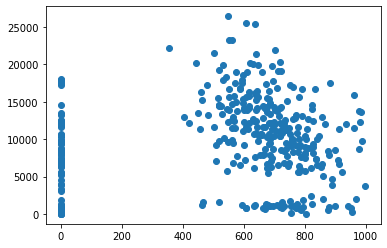

In [113]:
# your answer here

plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.show() 

# The variables are not correlated

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [114]:
# your answer here

fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

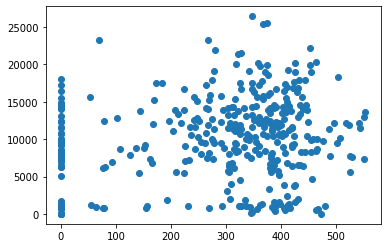

In [115]:
# your answer here

plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.show()

# The variables are not correlated

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [120]:
# your answer here

fitbit_subset = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]


In [121]:
fitbit_subset

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


In [123]:
import seaborn as sns

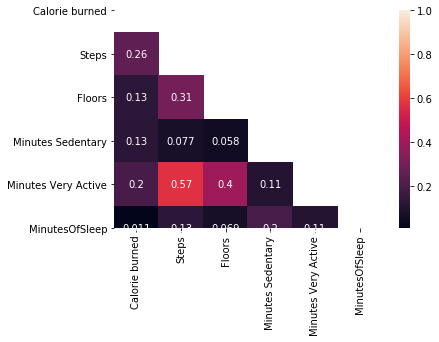

In [124]:
corr = fitbit_subset.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, annot = True, mask = mask)

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
# your answer here

# Minutes Very Active and Floors are the most correlated features with the variable steps.

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [125]:
# your answer here

time_grades = pd.read_csv('data/Time_Grades.csv')

#### Show visually the frequency distribution of the time_grades dataset.

In [126]:
# your answer here

time_grades.head(10)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB6F869F88>,
      dtype=object)

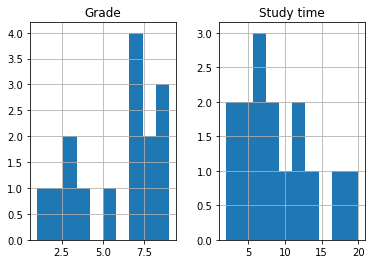

In [132]:
time_grades.hist()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [136]:
# your answer here

print(time_grades['Grade'].corr(time_grades['Study time'], method = 'pearson'))
print(time_grades['Grade'].corr(time_grades['Study time'], method = 'spearman'))

# Yes there is a positive correlation between study time and grade. There is a slight difference on the results comparing with both methods.

0.7980456073578858
0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

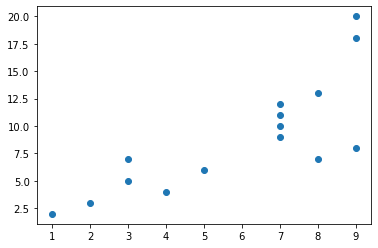

In [137]:
# your answer here

plt.scatter(time_grades['Grade'], time_grades['Study time'])
plt.show()

# Study time and grade are correlated, with the scatter plot it is possible to see some outliers.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here

'''Spearman correlation evaluates the correlation using ranked values, being able to analyse
variables that are correlated but not necessarily at a constant rate, while the Pearson correlation evaluates the 
linear relationship between two variables using the raw data.'''

